In [2]:
import numpy as np
import os

import matplotlib.pyplot as plt

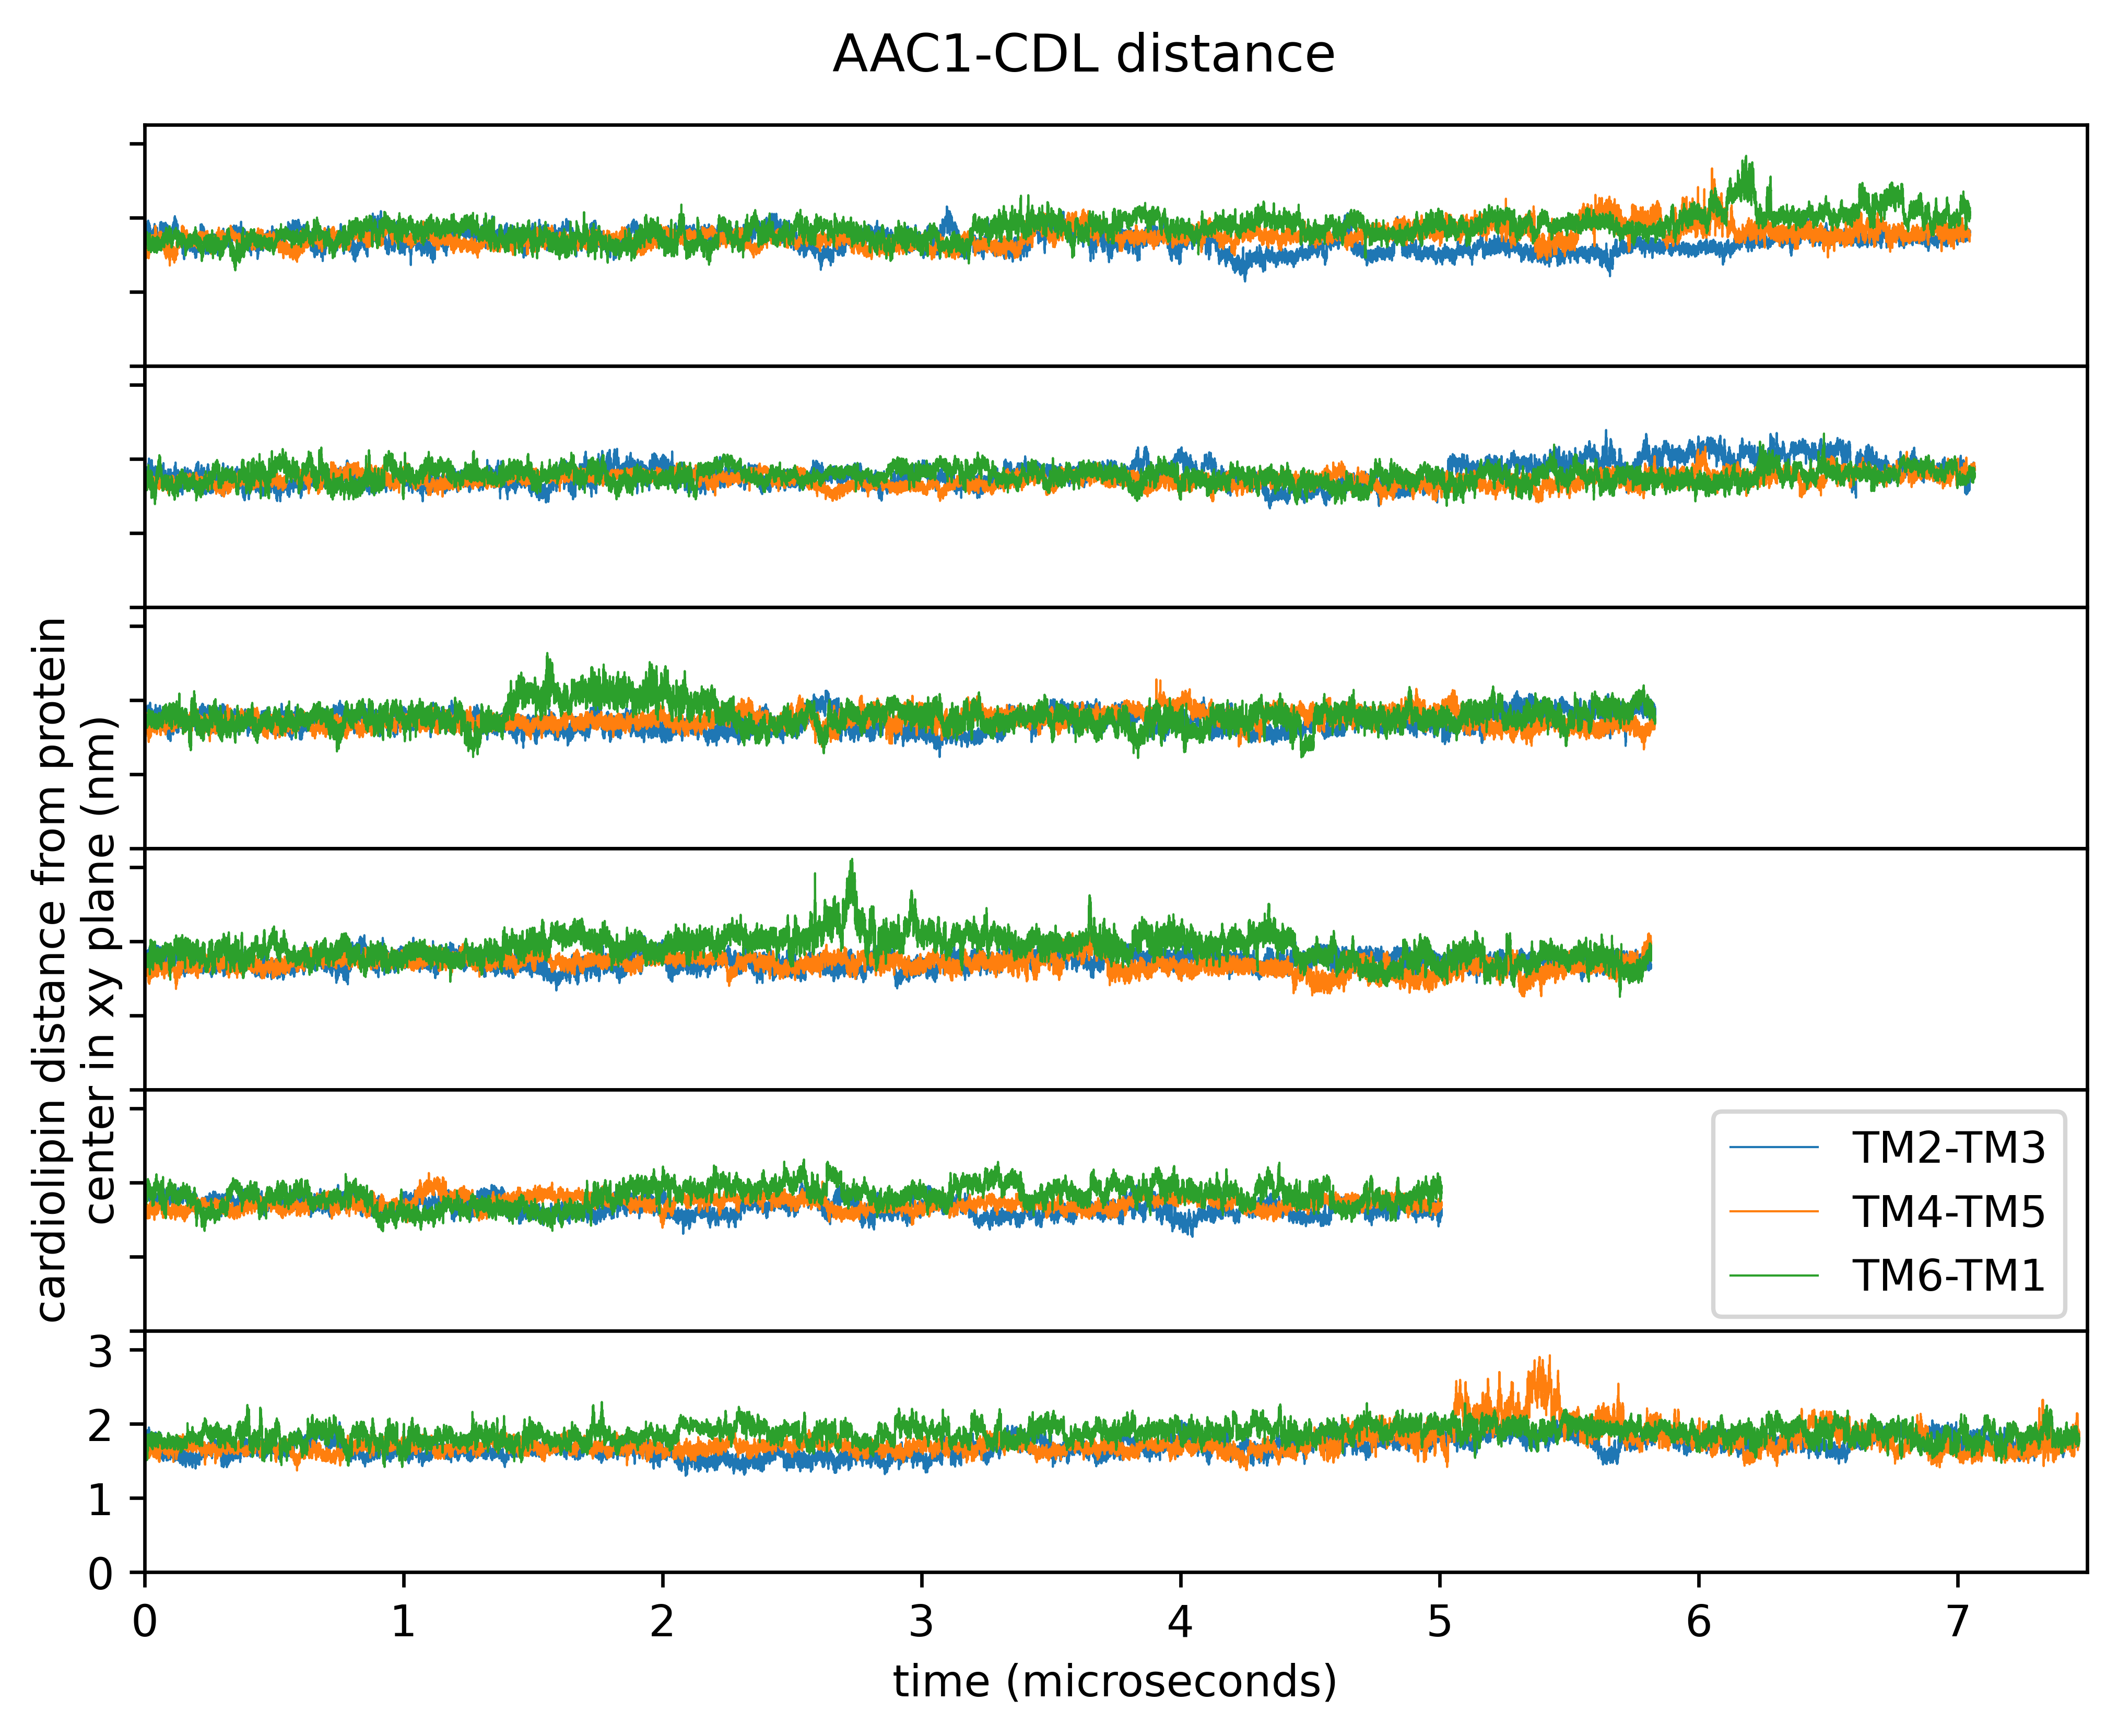

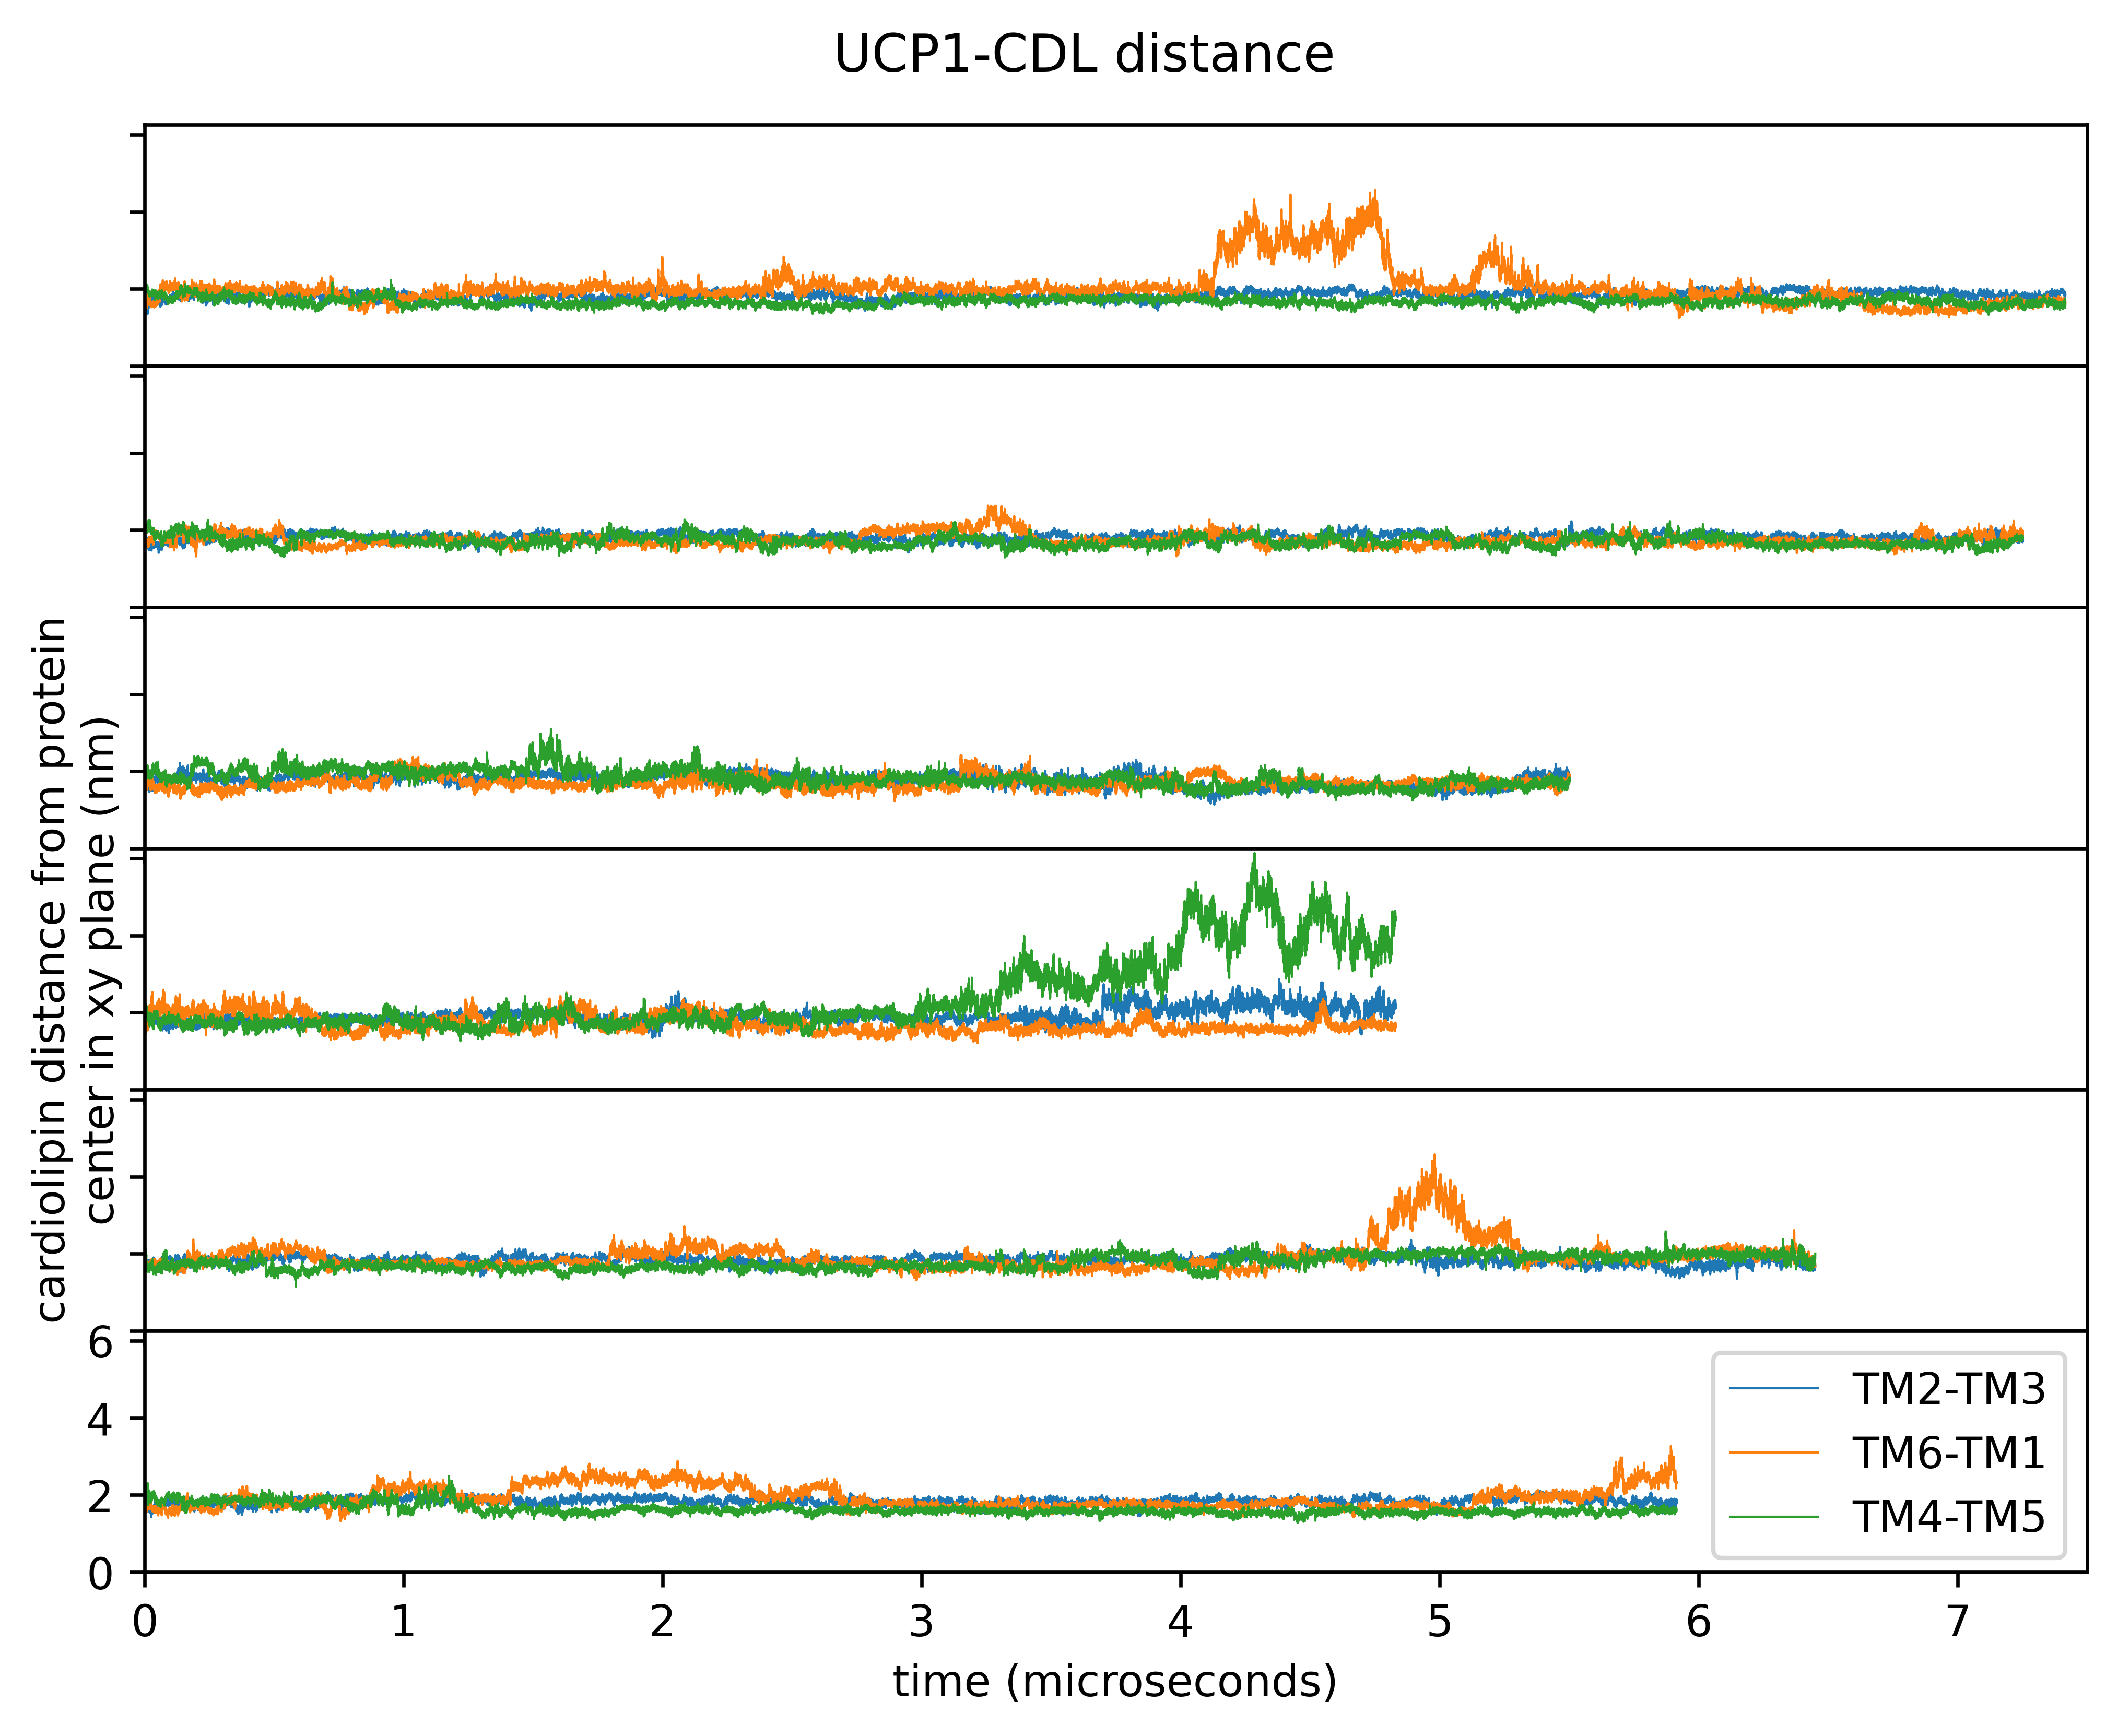

In [7]:
threshold = 0.33
window = 500

colors = ["C0", "C1", "C2", "C3", "C4", "grey"]
pdbids = {"aac1": "2C3E", "ucp1": "8HBV"}
protlims = {"aac1":3.25, "ucp1":6.25}
legend_inds = {"aac1":4, "ucp1":5}
ticks = {"aac1":[0,1,2,3], "ucp1":[0,2,4,6]}

cdlnames = {"aac1":["TM2-TM3", "TM4-TM5", "TM6-TM1"], "ucp1":["TM2-TM3", "TM6-TM1", "TM4-TM5"]}

def compile_rmsd():

    inputpath = "/home/jonathan/Documents/grabelab/aac1-ucp1/long-aac1-ucp1/cdl"

    servers = ["wynton", "degrabo"]
    proteins = ["aac1", "ucp1"]

    #loop over servers, proteins, and parallel runs
    for protein in proteins:

        fig = plt.figure(figsize = (8,6), dpi=600)
        gs = fig.add_gridspec(6, hspace=0) #-0.2 works otherwise
        axs = gs.subplots(sharex=True, sharey=True)

        ci = 0

        #wire_fractions = []

        # plt.figure(figsize = (15,6), dpi=600)

        for server in servers:
            for run in range(1,5):
                if server == "degrabo" and run > 2:
                    continue

                #step is in microseconds
                if server == "wynton" and (run == 3 or run == 4):
                    step = 1/10000
                else:
                    step = 1/5000

                dists = []
 
                for seg in range(1,20):

                    file = f"{inputpath}/{server}/{protein}/run0{run}/{protein}-{server}-run{str(run).zfill(2)}-seg{str(seg).zfill(2)}-cdlradii.npy"

                    if os.path.exists(file):
                        dists.append(np.load(file))

                dists = np.concatenate(dists)

                legend = []

                for j in range(3):
                    axs[ci].plot([i*step for i in range(len(dists))], dists[:,j], linewidth = 0.5)
                    if ci == legend_inds[protein]:
                        legend.append(cdlnames[protein][j])
            
                if ci == legend_inds[protein]:
                    axs[ci].legend(legend)

                axs[ci].set_yticks(ticks[protein])
                if ci != 5:
                    axs[ci].tick_params(axis='y', labelleft=False)

                ci+=1


        plt.xlim(0,7.5)
        plt.ylim(0,protlims[protein])

        axs[3].set_ylabel("cardiolipin distance from protein\ncenter in xy plane (nm)", va='center', labelpad=12)
        plt.xlabel("time (microseconds)")

        plt.suptitle(f"{protein.upper()}-CDL distance", y = 0.93)

        plt.savefig(f"figures/cardiolipin_distances_forsi_{protein}.svg", format="svg")


compile_rmsd()

In [ ]:

        #         #print(min(dists))
        #         smoothed_dists = [np.mean(dists[i:i+window]) for i in range(len(dists)-window)]

        #         plt.plot([i*step for i in range(len(smoothed_dists))], smoothed_dists, linewidth = 1.5, color = colors[ci])

        #         #plt.plot([i*step for i in range(len(dists))], dists, linewidth = 0.5)
        #         legend.append(f"{server} run {run}")
        #         #plt.show()
        #         ci += 1
                
        # #plt.axhline(0.33, 0, 8, color="black")
        # plt.xlim(0,7.5)
        # plt.ylim(0,0.5)
        # plt.legend(legend)
        # plt.title(f"{protein} RMSD")
        # plt.xlabel ("Time (µs)")
        # plt.ylabel (f"C-alpha RMSD to PDB {pdbids[protein]} (nm)")
 
        # plt.savefig(f"{inputpath}/rmsd_{protein}.png", bbox_inches='tight', format ='png')

        # plt.show()

        #print(wire_fractions)
        #print(f"wire forms {np.round(np.mean(wire_fractions), 4)}+={np.round(np.std(wire_fractions), 4)} of the time")